In [1]:
import pandas as pd 
import sklearn
import matplotlib.pyplot as plt 

from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
# Importando nuestro dataset
dt_heart = pd.read_csv('./documents/heart.csv')
dt_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
# Dividir el dataset en features y target
dt_features = dt_heart.drop(['target'], axis=1)
dt_target = dt_heart['target']

In [5]:
# Normalizar datos con StandardScaler
dt_features = StandardScaler().fit_transform(dt_features)

In [6]:
# Dividr nuestro dataset en datos de entrenamiento y datos de test
X_train, X_test, Y_train, Y_test = train_test_split(dt_features, dt_target, test_size=0.3, random_state=2)

In [7]:
print('X train: ', X_train.shape)
print('Y train: ', Y_train.shape)

X train:  (717, 13)
Y train:  (717,)


In [8]:
# Por defecto el n_components = min(n_muestras, n_features)
# Creamos nuestro PCA
pca = PCA(n_components=3)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [9]:
# Creamos nuestro IPCA
ipca = IncrementalPCA(n_components=3, batch_size=10)
ipca.fit(X_train)

IncrementalPCA(batch_size=10, copy=True, n_components=3, whiten=False)

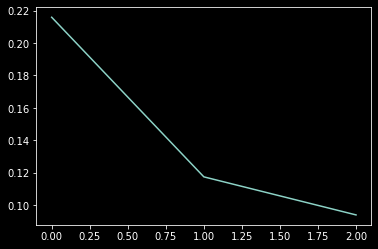

In [11]:
# Medir la varianza, de manera grafica
plt.style.use('dark_background')
plt.plot(range(len(pca.explained_variance_)), pca.explained_variance_ratio_)
plt.show()

In [15]:
# Configurar regresion logistica
logistic = LogisticRegression(solver='lbfgs')

In [17]:
# Configuramos los datos de entrenamiento
dt_train = pca.transform(X_train)
dt_test = pca.transform(X_test)

In [18]:
# Mandamos los data frames la la regresión logística
logistic.fit(dt_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
#Calculamos nuestra exactitud de nuestra predicción
print("SCORE PCA: ", logistic.score(dt_test, Y_test))

SCORE PCA:  0.8376623376623377


In [21]:
#Configuramos los datos de entrenamiento
dt_train = ipca.transform(X_train)
dt_test = ipca.transform(X_test)

In [22]:
# Mandamos los data frames la la regresión logística
logistic.fit(dt_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
#Calculamos nuestra exactitud de nuestra predicción
print("SCORE IPCA: ", logistic.score(dt_test, Y_test))

SCORE IPCA:  0.8506493506493507
